In [69]:
with open('local_train_image_plot_models_2', 'r') as f:
    lines = f.readlines()
len(lines)

432

In [70]:
with open('local_train_logs_for_models_2') as f:
    lines = f.readlines()
len(lines)  

48239

In [71]:
train_loss = [lines[0]]
test_loss = [lines[0]]
for line in lines:
    if 'train' in line:
        train_loss.append(line)
    elif 'test' in line:
        test_loss.append(line)



In [72]:
import pandas as pd
from io import StringIO
log_data = ''.join([line for i, line in enumerate(train_loss) if i == 0 or line != train_loss[i - 1]])

# Create a DataFrame using StringIO to read the string as a CSV
df = pd.read_csv(StringIO(log_data))

# Display the DataFrame
print(df)


      global_step  epoch  iter       loss      time  learning_rate  \
0             100     28    99  14.476957  0.000049        0.00025   
1             200     28   199  15.079063  0.000043        0.00025   
2             300     28   299  11.166157  0.000042        0.00025   
3             400     28   399  12.430537  0.000040        0.00025   
4             500     28   499  15.464226  0.000040        0.00025   
...           ...    ...   ...        ...       ...            ...   
1849       185000     79  3133  11.022144  0.000041        0.00025   
1850       185100     79  3233  19.136194  0.000045        0.00025   
1851       185200     79  3333  13.934065  0.000042        0.00025   
1852       185300     79  3433  18.458519  0.000045        0.00025   
1853       185400     79  3533  12.980024  0.000045        0.00025   

              tag  
0     train_ep_28  
1     train_ep_28  
2     train_ep_28  
3     train_ep_28  
4     train_ep_28  
...           ...  
1849  train_ep_79  

In [73]:
df.columns

Index(['global_step', 'epoch', 'iter', 'loss', 'time', 'learning_rate', 'tag'], dtype='object')

In [75]:
df.describe()

,global_step,epoch,iter,loss,time,learning_rate
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1.854000e+03
mean,92750.000000,53.509169,1783.302050,14.348615,0.000044,2.500000e-04
std,53534.801765,15.007488,1029.514988,2.222743,0.000003,3.592242e-15
min,100.000000,28.000000,1.000000,7.810361,0.000039,2.500000e-04
25%,46425.000000,41.000000,893.500000,12.794079,0.000042,2.500000e-04
50%,92750.000000,53.500000,1784.000000,14.237985,0.000044,2.500000e-04
75%,139075.000000,66.750000,2674.500000,15.792987,0.000045,2.500000e-04
max,185400.000000,79.000000,3565.000000,30.035660,0.000077,2.500000e-04


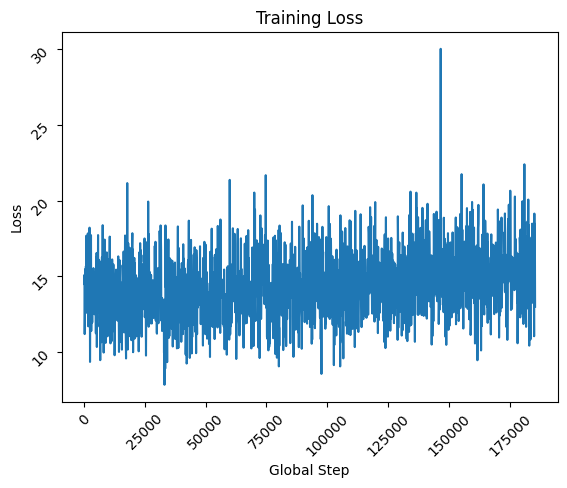

In [76]:
# plot the training loss with respect to the number of lines

import matplotlib.pyplot as plt

# show the ticks every 100 steps
plt.plot(df['global_step'], df['loss'])
plt.xlabel('Global Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# plt.xticks(range(0, 1000, 50))
# plt.yticks(range(0, 50, 1))
plt.show()

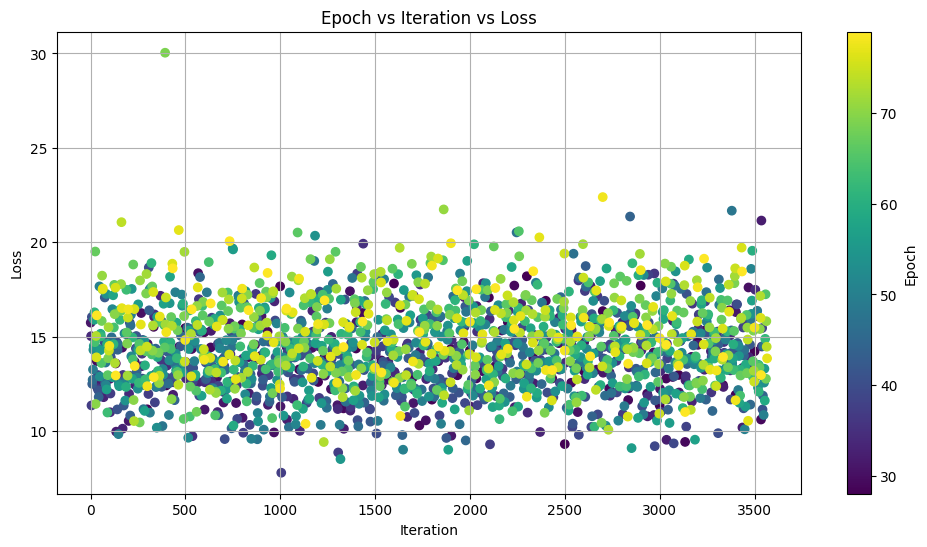

In [77]:
# Plotting epoch vs iter vs loss
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['iter'], df['loss'], c=df['epoch'], cmap='viridis')
plt.colorbar(scatter, label='Epoch')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Epoch vs Iteration vs Loss')
plt.grid(True)
plt.show()

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.5 MB/s eta 0:00:00a 0:00:01


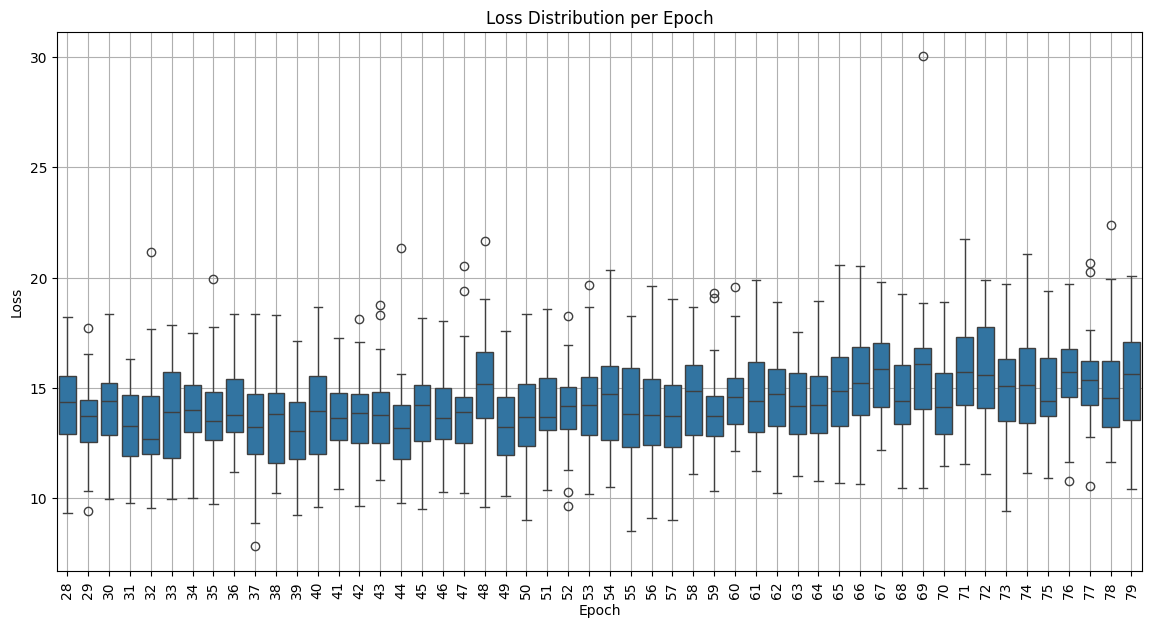

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for loss distribution per epoch
plt.figure(figsize=(14, 7))
sns.boxplot(x='epoch', y='loss', data=df)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Distribution per Epoch')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


       global_step  epoch        iter        loss        time  learning_rate
count        892.0  892.0  892.000000  892.000000  892.000000   8.920000e+02
mean        7132.0   29.0  445.500000    0.000365  150.567568   2.387288e-05
std            0.0    0.0  257.642517    0.000091   67.873416   3.390033e-21
min         7132.0   29.0    0.000000    0.000207   33.236056   2.387288e-05
25%         7132.0   29.0  222.750000    0.000316   91.876353   2.387288e-05
50%         7132.0   29.0  445.500000    0.000357  150.559711   2.387288e-05
75%         7132.0   29.0  668.250000    0.000393  209.257416   2.387288e-05
max         7132.0   29.0  891.000000    0.001765  267.798148   2.387288e-05


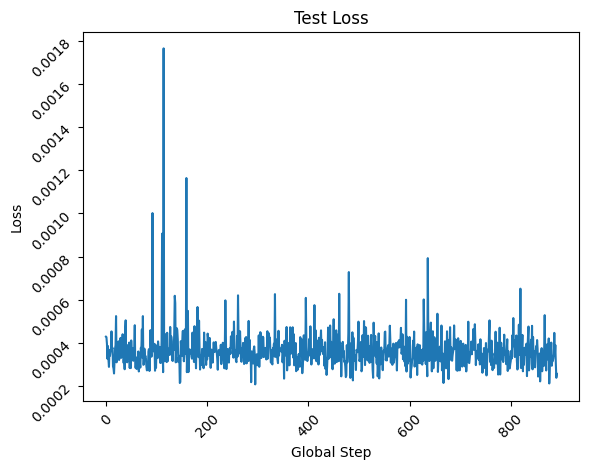

In [67]:
test_ep_28 = [lines[0]] + [line for line in test_loss if 'test_ep_29' in line]
log_data = ''.join([line for i, line in enumerate(test_ep_28) if i == 0 or line != test_ep_28[i - 1]])
df2 = pd.read_csv(StringIO(log_data))
print(df2.describe())
plt.plot(df2['iter'], df2['loss'])
plt.xlabel('Global Step')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
import wandb
run = wandb.init(
    # Set the project where this run will be logged
    project="xlstm_cv",
    name="main2", 
    id="123458",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": 'LEARNING_RATE',
        "epochs": 'EPOCHS',
    },
)
print(f"Wandb initialized with project_name : {run.project_name}, run_name : {run.name}, {run.id}")
